In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/harshan/Downloads/All dataset/08-Linear-Regression-Models/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales',axis=1)

In [5]:
y = df['sales']

# Polynomial Regression

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
poly_features = polynomial_converter.transform(X)

In [10]:
poly_features.shape # 3 original, 3 interaction, 3 squared terms

(200, 9)

In [11]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [12]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [13]:
230.1*37.8

8697.779999999999

In [14]:
230.1**2

52946.009999999995

In [15]:
from sklearn.model_selection import train_test_split

# Train the Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

## This is now a training model on nine features. 

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
test_predictions = model.predict(X_test)

In [21]:
model.coef_  # 9 coefficient

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

## Evaluate the performance

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
MAE = mean_absolute_error(y_test, test_predictions)

In [24]:
MSE = mean_squared_error(y_test, test_predictions)

In [25]:
RMSE = np.sqrt(MSE)

In [26]:
MAE

0.48967980448037

In [27]:
RMSE

0.6646431757269196

## Overfitting or underfitting.
## calculate which polynomial degree to choose.

In [28]:
# create the different order poly
# split poly feat train/test
# fit on train
# store/save the rmse for BOTH the train and test
# PLOT the results (error vs poly order)

In [29]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):  # 10 is an extreme amount of degree but it's just for better visualization.
    
    poly_converter = PolynomialFeatures(degree=d,include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [30]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902067,
 0.35170836883993495,
 0.2509342951990972,
 0.1971254009841768,
 5.421422348088462,
 0.1426544837726474,
 0.16675345956185658]

In [31]:
test_rmse_errors

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825231453,
 0.5077742623872589,
 2.5758247707699113,
 4.492670773896812,
 1381.404068580479,
 4449.568027403435,
 95893.02658330933]

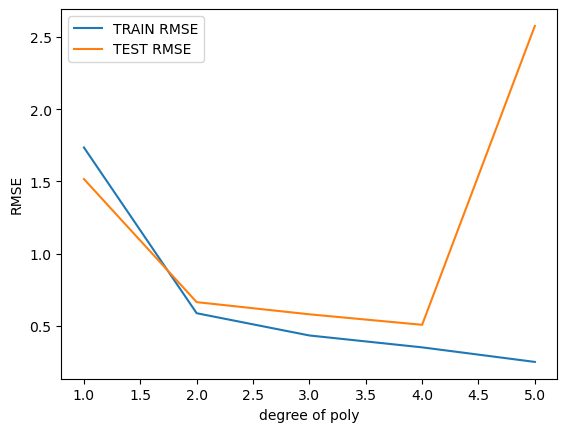

In [32]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')

plt.ylabel("RMSE")
plt.xlabel('degree of poly')
plt.legend()

## final output based on RMSE

In [33]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [34]:
final_model = LinearRegression()

In [35]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

## Saving the converter and the fitted final model

In [36]:
from joblib import dump,load

In [37]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [38]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

## For predictiong future model with different dataset

In [39]:
loaded_converter = load('final_converter.joblib')

In [40]:
loaded_model = load('final_poly_model.joblib')

In [41]:
campaign = [[149,22,12]]

## It expects more features for 3rd degree as it expects 9nth features for 2nd degree

In [42]:
loaded_converter.fit_transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [43]:
loaded_converter.fit_transform(campaign).shape

(1, 19)

In [44]:
transformed_data = loaded_converter.fit_transform(campaign)

In [45]:
loaded_model.predict(transformed_data)

array([14.64501014])